In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.Age.median()
median=df.Age.median()
median
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [6]:
df['Age_median'] =df['Age'].fillna('median')
df['Age_median']

0        22.0
1        38.0
2        26.0
3        35.0
4        35.0
        ...  
886      27.0
887      19.0
888    median
889      26.0
890      32.0
Name: Age_median, Length: 891, dtype: object

In [7]:
df['Age_median'] =df['Age'].fillna('median')
df['Age_median']

0        22.0
1        38.0
2        26.0
3        35.0
4        35.0
        ...  
886      27.0
887      19.0
888    median
889      26.0
890      32.0
Name: Age_median, Length: 891, dtype: object

In [8]:
impute_nan(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


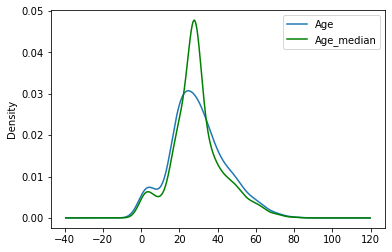

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde',color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [10]:
impute_nan(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [11]:
def impute_nan(df,variable,median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] =df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [12]:
median=df.Age.median()

impute_nan(df,"Age",median)
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [13]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [14]:
random_sample.index = df[df['Age'].isnull()].index

In [15]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [16]:
df.loc[df['Age'].isnull(),'Age'] = random_sample

In [17]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,15.0,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


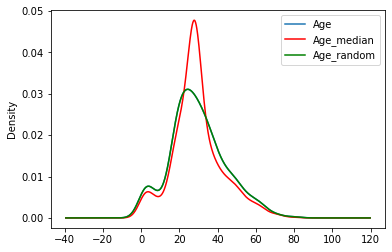

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [19]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [21]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [22]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [23]:

df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


In [24]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

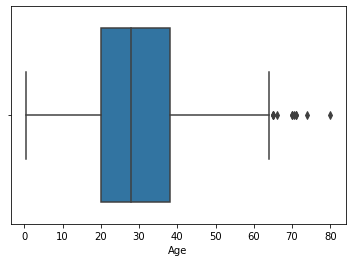

In [25]:
sns.boxplot('Age',data=df)

In [26]:
df.Age.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [27]:
df['Age'].mean()

29.69911764705882

In [28]:
df['Age'].std()

14.526497332334044

In [29]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

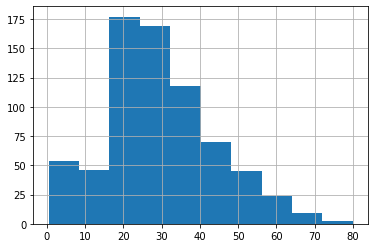

In [30]:
df.Age.hist()

<AxesSubplot:>

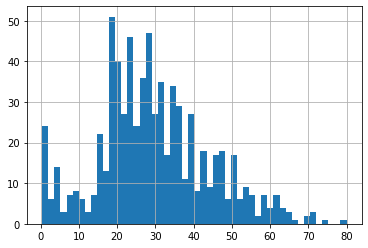

In [31]:
df.Age.hist(bins=50)

In [32]:
extreme = df.Age.mean()+3*df.Age.std()

In [33]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

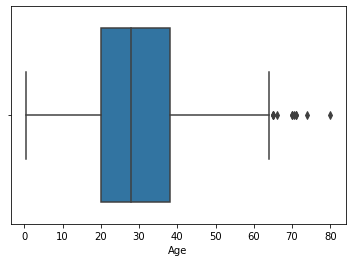

In [34]:
sns.boxplot('Age',data=df)

In [35]:
df['Age'].mean()

29.69911764705882

In [36]:
df['Age'].std()

14.526497332334044

In [37]:
extreme = df.Age.mean()+3*df.Age.std()

In [38]:
extreme


73.27860964406095

In [39]:
df['Age_extreme'] = df['Age'].fillna(extreme)

In [40]:
df['Age_extreme']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    73.27861
889    26.00000
890    32.00000
Name: Age_extreme, Length: 891, dtype: float64

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_extreme'>

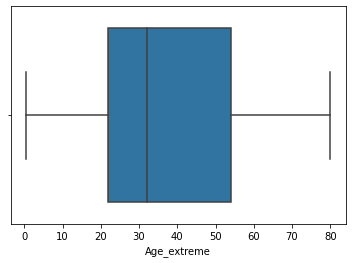

In [41]:
sns.boxplot('Age_extreme',data=df)

In [42]:
df = pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [46]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [47]:
df['BsmtQual'].mode()[0]

'TA'

In [48]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [49]:
df['FireplaceQu'].mode()[0]

'Gd'

In [50]:
df['GarageType'].mode()[0

]

'Attchd'

In [51]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [52]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

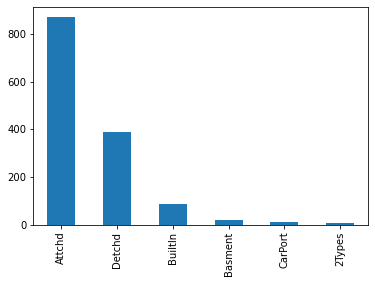

In [53]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

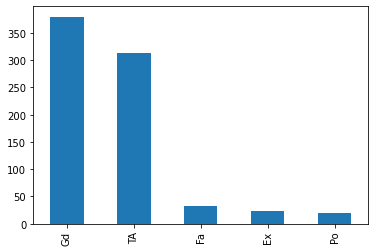

In [54]:
df['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot:>

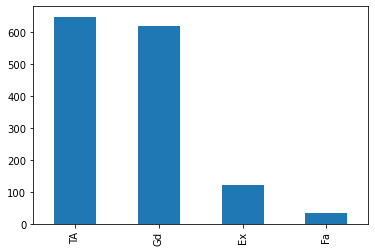

In [55]:
df['BsmtQual'].value_counts().plot.bar()

In [56]:
def impute_nan(df,variable):
    most_frequent_value = df[variable].mode()[0]
    df[variable].fillna(most_frequent_value,inplace=True)


In [57]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
     impute_nan(df,feature)

In [58]:
df.isnull().mean()



BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [59]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [60]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [61]:
df.FireplaceQu.fillna("Others",inplace=True)

In [62]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Others,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Others,Attchd,142125


In [63]:
df.isna().sum()

BsmtQual       37
FireplaceQu     0
GarageType     81
SalePrice       0
dtype: int64

<AxesSubplot:>

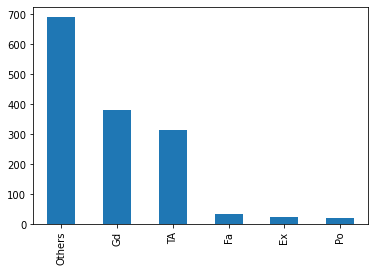

In [64]:
df['FireplaceQu'].value_counts().plot.bar()

In [65]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [66]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [67]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [68]:
pd.get_dummies(df,columns=['Sex']).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [69]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])


In [70]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
df

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [72]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [73]:
df=pd.read_csv('titanic.csv',usecols=['Embarked','Sex'])

In [74]:
df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [75]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [76]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [77]:
df.dropna(inplace=True)

In [78]:
df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [79]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [80]:
df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [81]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [82]:
df = pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [83]:
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [84]:
len(df['X0'].unique())

47

In [85]:
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [86]:
lst10 = df['X0'].value_counts().sort_values(ascending=False).head(10).index

In [87]:
for  i in lst10:
    df[i] = np.where(df["X0"]==0,i,0)
    df

In [88]:
df.head(10)

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,0,0,0,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,0,0,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,0,0,0,0,0,0,0,0,0,0
8,w,s,as,e,d,f,i,0,0,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,0,0,0,0,0,0,0,0,0,0


In [89]:
df['X1'].value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [90]:
df = pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [91]:
lst11 = df['X1'].value_counts().sort_values(ascending=False).head(10).index
lst11

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [92]:
for  i in lst11:
    df[i] = np.where(df["X1"]==0,i,0)
    df

In [93]:
df

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,0,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [94]:
df.drop("X0",axis=1,inplace=True)

In [95]:
df

,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,0,0,0,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,v,r,a,d,aa,g,0,0,0,0,0,0,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


import datatime

In [96]:
import datetime

In [97]:
today_date = datetime.datetime.today()

In [98]:
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [99]:
days

[datetime.datetime(2022, 5, 1, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 30, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 29, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 28, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 27, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 26, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 25, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 24, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 23, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 22, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 21, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 20, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 19, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 18, 17, 55, 44, 641647),
 datetime.datetime(2022, 4, 17, 17, 55, 44, 641647)]

In [100]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()


,Day
0,2022-05-01 17:55:44.641647
1,2022-04-30 17:55:44.641647
2,2022-04-29 17:55:44.641647
3,2022-04-28 17:55:44.641647
4,2022-04-27 17:55:44.641647


In [101]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2022-05-01 17:55:44.641647,Sunday
1,2022-04-30 17:55:44.641647,Saturday
2,2022-04-29 17:55:44.641647,Friday
3,2022-04-28 17:55:44.641647,Thursday
4,2022-04-27 17:55:44.641647,Wednesday


In [102]:
dictionary={'Monday':1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}

In [103]:
data['weekday_ordinal']= data['weekday'].map(dictionary)

In [104]:
data

,Day,weekday,weekday_ordinal
0,2022-05-01 17:55:44.641647,Sunday,7
1,2022-04-30 17:55:44.641647,Saturday,6
2,2022-04-29 17:55:44.641647,Friday,5
3,2022-04-28 17:55:44.641647,Thursday,4
4,2022-04-27 17:55:44.641647,Wednesday,3
5,2022-04-26 17:55:44.641647,Tuesday,2
6,2022-04-25 17:55:44.641647,Monday,1
7,2022-04-24 17:55:44.641647,Sunday,7
8,2022-04-23 17:55:44.641647,Saturday,6
9,2022-04-22 17:55:44.641647,Friday,5


Count or frequency encoding

In [105]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
train_set.drop(0,axis=1,inplace=True)

In [107]:
train_set.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [108]:
train_set.shape

(32561, 14)

In [109]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [110]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [111]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [112]:
train_set.rename({'Status':'Status_1'},axis=1)

,Employment,Degree,Status_1,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [113]:
len(train_set['Employment'].unique())

9

In [114]:
train_set['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [115]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()))

Employment : 9
Degree : 16
Status : 7
Designation : 15
family_job : 6
Race : 5
Sex : 2
Country : 42


In [116]:
country_map = train_set['Country'].value_counts().to_dict()

In [117]:
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [118]:
train_set['Country'] = train_set['Country'].map(country_map)

In [119]:
train_set['Country']

0        29170
1        29170
2        29170
3        29170
4           95
         ...  
32556    29170
32557    29170
32558    29170
32559    29170
32560    29170
Name: Country, Length: 32561, dtype: int64

In [120]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


In [138]:
df = pd.read_csv("titanic.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [139]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [140]:
df['Cabin'].fillna('Missing',inplace=True)

In [141]:
df['Cabin']

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [142]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [143]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [144]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [152]:
df['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [153]:
ordinal_lables = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_lables

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [154]:
ordinal_labels1 = {k:i for i,k in enumerate(ordinal_lables)}
ordinal_labels1

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [163]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels1)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [164]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [165]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [169]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)


In [170]:
df['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [171]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


SCALING

In [172]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [173]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass   Age     Fare
0           0       3  22.0   7.2500
1           1       1  38.0  71.2833
2           1       3  26.0   7.9250
3           1       1  35.0  53.1000
4           0       3  35.0   8.0500
..        ...     ...   ...      ...
886         0       2  27.0  13.0000
887         1       1  19.0  30.0000
888         0       3   NaN  23.4500
889         1       1  26.0  30.0000
890         0       3  32.0   7.7500

[891 rows x 4 columns]>